In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pso import ParticleSwarmOptimizedClustering
from particle import quantization_error, calc_sse
from utils import normalize
import utils
from kmeans import KMeans

In [3]:
data = pd.read_csv('./data/iris.data', sep=',', header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data_classes = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
y = np.array(data[4].apply(data_classes.index))
x = data.drop([4], axis=1)
x = x.values
x = normalize(x)

# K-Means

In [5]:
kmeans = KMeans(n_cluster=3, init_pp=False, seed=2018)
kmeans.fit(x)

In [6]:
predicted_kmeans = kmeans.predict(x)
print('Silhouette:', silhouette_score(x, predicted_kmeans))
print('SSE:', kmeans.SSE)
print('Quantization:', quantization_error(centroids=kmeans.centroid, data=x, labels=predicted_kmeans))
print('Err_ratio:', utils.stupid_precision_ratio(predicted_kmeans, y, 3))

Silhouette: 0.5043188549150883
SSE: 6.998114004826762
Quantization: 0.19524413664147766
Err_ratio: (0.8866666666666667, (2, 0, 1))


In [7]:
kmeans2 = KMeans(n_cluster=3, init_pp=True, seed=2018)
kmeans2.fit(x)
predicted_kmeans2 = kmeans2.predict(x)
print('Silhouette:', silhouette_score(x, predicted_kmeans))
print('SSE:', kmeans2.SSE)
print('Quantization:', quantization_error(centroids=kmeans2.centroid, data=x, labels=predicted_kmeans2))
print('Err_ratio:', utils.stupid_precision_ratio(predicted_kmeans2, y, 3))

Silhouette: 0.5043188549150883
SSE: 10.90827498962253
Quantization: 0.2049806792871817
Err_ratio: (0.5733333333333334, (2, 0, 1))


# PSO

In [40]:
pso = ParticleSwarmOptimizedClustering(
        n_cluster=3, n_particles=20,dump_w=0.99,w=1,c2=2,c1=1, data=x, hybrid = True, max_iter=8000, print_debug=1000)

In [41]:
hist = pso.run()

Initial global best score 7.138647703985377
Iteration 0001/8000 current gbest score 7.138647703985377291


C:\Users\moham\Desktop\2CS\Optim\Projet\Partitioning_Clustering_using_PSO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Iteration 1001/8000 current gbest score 7.020740645474900177
Iteration 2001/8000 current gbest score 7.020740645474900177
Iteration 3001/8000 current gbest score 7.020740645474900177
Iteration 4001/8000 current gbest score 7.020740645474900177
Iteration 5001/8000 current gbest score 7.020740645474900177
Iteration 6001/8000 current gbest score 7.020740645474900177
Iteration 7001/8000 current gbest score 7.020740645474898400
Finish with gbest score 7.020740645474897512


In [45]:
pso_kmeans = KMeans(n_cluster=3, init_pp=False, seed=2018)

In [46]:
pso_kmeans.centroid = pso.gbest_centroids.copy()
pso_kmeans.centroid

array([[0.43876747, 0.30189377, 0.58273389, 0.54130021],
       [0.19045263, 0.58247906, 0.08154559, 0.05768558],
       [0.6954183 , 0.45602319, 0.79638339, 0.83058268]])

In [47]:
predicted_pso = pso_kmeans.predict(x)
print('Silhouette:', silhouette_score(x, predicted_pso))
print('SSE:', calc_sse(centroids=pso.gbest_centroids, data=x, labels=predicted_pso))
print('Quantization:', quantization_error(pso.gbest_centroids, predicted_pso, x))
print('Err_ratio:', utils.stupid_precision_ratio(predicted_pso, y, 3))

Silhouette: 0.5043188549150883
SSE: 7.0207406454748975
Quantization: 0.19517960575395943
Err_ratio: (0.8866666666666667, (1, 0, 2))


In [28]:
predicted_pso

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [29]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [30]:
from sklearn.decomposition import PCA
pca = PCA(x.shape[1])
X_iris_r = pca.fit(x).transform(x)

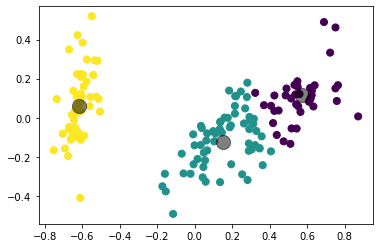

In [31]:
plt.scatter(X_iris_r[:, 0], X_iris_r[:, 1], c=predicted_pso, s=50, cmap='viridis')

centers = pca.transform(pso.gbest_centroids)    

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

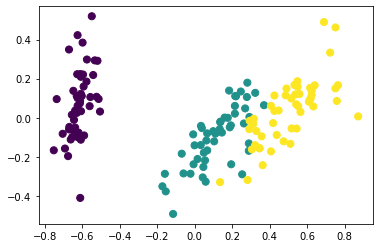

In [17]:
plt.scatter(X_iris_r[:, 0], X_iris_r[:, 1], c=y, s=50, cmap='viridis')

# Repeated Test

### K-Means++

In [13]:
kmeanspp = {
    'silhouette': [],
    'sse' : [],
    'quantization' : [],
}
for _ in range(20):
    kmean_rep = KMeans(n_cluster=3, init_pp=True)
    kmean_rep.fit(x)
    predicted_kmean_rep = kmean_rep.predict(x)
    silhouette = silhouette_score(x, predicted_kmean_rep)
    sse = kmean_rep.SSE
    quantization = quantization_error(centroids=kmean_rep.centroid, data=x, labels=predicted_kmean_rep)
    kmeanspp['silhouette'].append(silhouette)
    kmeanspp['sse'].append(sse)
    kmeanspp['quantization'].append(quantization)

### PSO 

In [19]:
%%time
pso_plain = {
    'silhouette': [],
    'sse' : [],
    'quantization' : [],
}
for _ in range(20):
    pso_rep = ParticleSwarmOptimizedClustering(
        n_cluster=3, n_particles=10, data=x,dump_w=0.99,c1=2,c2=2,w=1, hybrid=False, max_iter=2000, print_debug=2000)
    pso_rep.run()
    pso_kmeans = KMeans(n_cluster=3, init_pp=False, seed=2018)
    pso_kmeans.centroid = pso_rep.gbest_centroids.copy()
    predicted_pso_rep = pso_kmeans.predict(x)
    
    silhouette = silhouette_score(x, predicted_pso_rep)
    sse = calc_sse(centroids=pso_rep.gbest_centroids, data=x, labels=predicted_pso_rep)
    quantization = pso_rep.gbest_score
    pso_plain['silhouette'].append(silhouette)
    pso_plain['sse'].append(sse)
    pso_plain['quantization'].append(quantization)

Initial global best score 0.2431153843813657
Iteration 0001/2000 current gbest score 0.243115384381365707


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.213098205576494171
Initial global best score 0.19467141182285472
Iteration 0001/2000 current gbest score 0.194671411822854717


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.179239468351963444
Initial global best score 0.18507380261010256
Iteration 0001/2000 current gbest score 0.185073802610102561


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.175875998308897996
Initial global best score 0.224749553280849
Iteration 0001/2000 current gbest score 0.224749553280849002


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.211296264659666638
Initial global best score 0.27019288128934255
Iteration 0001/2000 current gbest score 0.270192881289342546


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.213171902236503258
Initial global best score 0.2107002958888676
Iteration 0001/2000 current gbest score 0.210700295888867600


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.202009563210388238
Initial global best score 0.24963718203751362
Iteration 0001/2000 current gbest score 0.249637182037513616


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.232910849279922560
Initial global best score 0.21897628661076463
Iteration 0001/2000 current gbest score 0.218976286610764626


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.189127547177255884
Initial global best score 0.21197231508969439
Iteration 0001/2000 current gbest score 0.211972315089694385


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.200112106832221359
Initial global best score 0.20559135494351946
Iteration 0001/2000 current gbest score 0.205591354943519461


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.176121912934118247
Initial global best score 0.255610122690971
Iteration 0001/2000 current gbest score 0.249486526124538560


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.203462219987282561
Initial global best score 0.23035860101597475
Iteration 0001/2000 current gbest score 0.230358601015974745


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.201200847829100554
Initial global best score 0.23880274361632545
Iteration 0001/2000 current gbest score 0.238802743616325447


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.203870149191969136
Initial global best score 0.23804207637920652
Iteration 0001/2000 current gbest score 0.212909404124141721


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.195218871134553940
Initial global best score 0.21906324762377238
Iteration 0001/2000 current gbest score 0.219063247623772384


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.194917542070308508
Initial global best score 0.23620662080083407
Iteration 0001/2000 current gbest score 0.236206620800834072


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.203600217898763175
Initial global best score 0.21891156028439693
Iteration 0001/2000 current gbest score 0.218911560284396928


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.202442217858686407
Initial global best score 0.19900933063163387
Iteration 0001/2000 current gbest score 0.199009330631633868


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.189492063922788473
Initial global best score 0.2269481653403105
Iteration 0001/2000 current gbest score 0.226948165340310509


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.201712695984712531
Initial global best score 0.23984638791186433
Iteration 0001/2000 current gbest score 0.237337059875291440


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.198277540932677659
Wall time: 2min 11s


### PSO Hybrid

In [21]:
%%time
pso_hybrid = {
    'silhouette': [],
    'sse' : [],
    'quantization' : [],
}
for _ in range(20):
    pso_rep = ParticleSwarmOptimizedClustering(
        n_cluster=3, n_particles=10, data=x,dump_w=0.99,c1=2,c2=2,w=1, hybrid=True, max_iter=2000, print_debug=2000)
    pso_rep.run()
    pso_kmeans = KMeans(n_cluster=3, init_pp=False, seed=2018)
    pso_kmeans.centroid = pso_rep.gbest_centroids.copy()
    predicted_pso_rep = pso_kmeans.predict(x)
    
    silhouette = silhouette_score(x, predicted_pso_rep)
    sse = calc_sse(centroids=pso_rep.gbest_centroids, data=x, labels=predicted_pso_rep)
    quantization = pso_rep.gbest_score
    pso_hybrid['silhouette'].append(silhouette)
    pso_hybrid['sse'].append(sse)
    pso_hybrid['quantization'].append(quantization)

Initial global best score 0.19524413664147766
Iteration 0001/2000 current gbest score 0.195244136641477661


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.194860482920887007
Initial global best score 0.19618667657047784
Iteration 0001/2000 current gbest score 0.196186676570477836


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.195831556995042927
Initial global best score 0.1962931514745171
Iteration 0001/2000 current gbest score 0.196293151474517091


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.195084166971718570
Initial global best score 0.19524413664147766
Iteration 0001/2000 current gbest score 0.195244136641477661


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.194915977935499002
Initial global best score 0.19618667657047784
Iteration 0001/2000 current gbest score 0.196186676570477836


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.195859928926845034
Initial global best score 0.19524413664147766
Iteration 0001/2000 current gbest score 0.195244136641477661


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.194727072550676200
Initial global best score 0.2049806792871817
Iteration 0001/2000 current gbest score 0.203194142861129662


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.180520514308677299
Initial global best score 0.19618667657047784
Iteration 0001/2000 current gbest score 0.196068189052090530


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.193353944269945094
Initial global best score 0.19524413664147766
Iteration 0001/2000 current gbest score 0.195244136641477661


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.194734929166870963
Initial global best score 0.2049806792871817
Iteration 0001/2000 current gbest score 0.204980679287181694


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.174698204850700645
Initial global best score 0.21985059780030372
Iteration 0001/2000 current gbest score 0.219850597800303721


D:\Programs\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Programs\Anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)
d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.214223136650123852
Initial global best score 0.19524413664147766
Iteration 0001/2000 current gbest score 0.195244136641477661
Finish with gbest score 0.194817504128015323
Initial global best score 0.19524413664147766
Iteration 0001/2000 current gbest score 0.195244136641477661


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.194693795280330068
Initial global best score 0.2049806792871817
Iteration 0001/2000 current gbest score 0.204980679287181694


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.195527321997299636
Initial global best score 0.19524413664147766
Iteration 0001/2000 current gbest score 0.195244136641477661


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.194682390502658426
Initial global best score 0.19618667657047784
Iteration 0001/2000 current gbest score 0.196186676570477836


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.194177276161650342
Initial global best score 0.19524413664147766
Iteration 0001/2000 current gbest score 0.195244136641477661


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.193817834034274550
Initial global best score 0.19618667657047784
Iteration 0001/2000 current gbest score 0.196186676570477836


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.193876885159073725
Initial global best score 0.19524413664147766
Iteration 0001/2000 current gbest score 0.195244136641477661


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.194122351984317515
Initial global best score 0.1962931514745171
Iteration 0001/2000 current gbest score 0.196293151474517091


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.193231098421109637
Wall time: 1min 50s


# Comparison

In [22]:
benchmark = {
    'method' : ['K-Means++', 'PSO', 'PSO Hybrid'],
    'sse_mean' : [
        np.around(np.mean(kmeanspp['sse']), decimals=10),
        np.around(np.mean(pso_plain['sse']), decimals=10),
        np.around(np.mean(pso_hybrid['sse']), decimals=10),
    ],
    'sse_stdev' : [
        np.around(np.std(kmeanspp['sse']), decimals=10),
        np.around(np.std(pso_plain['sse']), decimals=10),
        np.around(np.std(pso_hybrid['sse']), decimals=10),
    ],
    'silhouette_mean' : [
        np.around(np.mean(kmeanspp['silhouette']), decimals=10),
        np.around(np.mean(pso_plain['silhouette']), decimals=10),
        np.around(np.mean(pso_hybrid['silhouette']), decimals=10),
    ],
    'silhouette_stdev' : [
        np.around(np.std(kmeanspp['silhouette']), decimals=10),
        np.around(np.std(pso_plain['silhouette']), decimals=10),
        np.around(np.std(pso_hybrid['silhouette']), decimals=10),
    ],
    'quantization_mean' : [
        np.around(np.mean(kmeanspp['quantization']), decimals=10),
        np.around(np.mean(pso_plain['quantization']), decimals=10),
        np.around(np.mean(pso_hybrid['quantization']), decimals=10),
    ],
    'quantization_stdev' : [
        np.around(np.std(kmeanspp['quantization']), decimals=10),
        np.around(np.std(pso_plain['quantization']), decimals=10),
        np.around(np.std(pso_hybrid['quantization']), decimals=10),
    ],
}

In [23]:
benchmark

{'method': ['K-Means++', 'PSO', 'PSO Hybrid'],
 'sse_mean': [8.0459211006, 10.3455890994, 7.9015546244],
 'sse_stdev': [1.6535763914, 2.3428745331, 1.596426723],
 'silhouette_mean': [0.4917327084, 0.4871404119, 0.4940488978],
 'silhouette_stdev': [0.0095544033, 0.0235880626, 0.0115855836],
 'quantization_mean': [0.1981495423, 0.1993579093, 0.1938878187],
 'quantization_stdev': [0.0039626853, 0.0131629743, 0.0069952424]}

In [31]:
benchmark_df = pd.DataFrame.from_dict(benchmark)
benchmark_df

,method,sse_mean,sse_stdev,silhouette_mean,silhouette_stdev,quantization_mean,quantization_stdev
0,K-Means++,8.045921,1.653576,0.491733,0.009554,0.198150,0.003963
1,PSO,10.345589,2.342875,0.487140,0.023588,0.199358,0.013163
2,PSO Hybrid,7.901555,1.596427,0.494049,0.011586,0.193888,0.006995


In [25]:
benchmark_df.to_excel('benchmark_iris_res.xlsx', index=False)

In [26]:
benchmark_df.to_csv('benchmark_iris_res.csv', index=False)